# Background

Purpose: Create a program to represent a circuit.(i.e. PySpice)

To be able to create a program that can model/represent a ciruict you must first create a circuit: 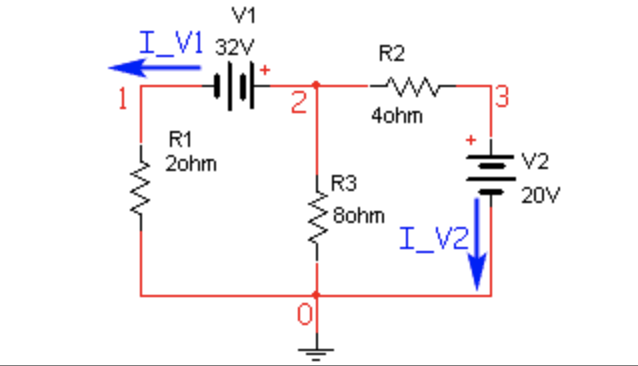 above is the circuit that was used to create to program. 

# Assumptions:

Applied only to a circuit with passive elements(resistors) and independent sources.

# Modified Node Analysis

When modeling the circuit, there are a couple mathematical equations to keep in mind so you can go through with using modified node analysis so that you can generate the circuit through code. Modified node analysis is made up of multiple matrices and is ONLY applied to a ciruit with passive elements such as resistors. The circuit can be solved using a simple equation of $x$ = $A$<sup>-1</sup>$Z$ where A is made up of multiple matrices and Z is its own matrix. A is made up of four different matrices, $G(nxn)$,$B(nxm)$,$C$(transpose of $B$), and $D(mxm$ and composed of only zeros). $n$ being the node sources and $m$ is the independent voltage sources. So when you put it together it will look like: $$A = \left(\begin{array}{cc} G & B\\C & D \end{array}\right)
$$
while $Z$ is made up of the circuit's voltage and current sources and looks like $$ Z = \left(\begin{array}{cc} i \\e \end{array}\right)$$ where $i$ is the matrix $nx1$ and contains the sum of the currents and $e$ is the matrix $mx1$ and contains the values of the independent voltage sources.


# Creation of Each Matrix

## A Matrix
- ($n+m$,$n+m$)for the size of the matrix which are made up of only known values.
- ($nxn$) part of the matrix is the upper left. 
    - passive elements only(resistors)
    - the diagnol terms are only composed of elements connected to the ground.
    - elements not connected to ground can be on non-diagnol and also diganol terms.
- the remaining part of the matrix not including the ($nxn$) is composed of only $-1,0,$ and $1$ 

## Z matrix
- ($n+m$)<sub>x</sub>$1$ and is composed only of known quanities.
- The $n$ elements(top) are the sum and disparity of the independent current sources.
- The $m$ elements(bottom) are the voltage sources in the circuit.

## G Matrix($nxn$)

The $G$ matrix is made up of the passive elements in the ciruict and the connection between them and the nodes they are connected to. It is a $3x3$ matrix meaning that diagnols but me taken into account when creating the matrix.

## B Matrix($nxm$)

The $B$ matrix is determined by looking at the connections to the voltage sources. It is only made up of $0,1,$ and $-1$ elements. $2x2$ matrix.

## C Matrix($mxn$)

The $C$ matrix is also only made of $0,1$ and $-1$ elements and is essentially just the transpose of matrix $B$. $3x2$ matrix.

## D Matrix($mxm$)

The $D$ matrix is made up of only zeros. However, it can be non-zero if dependent sources are taken into account.

## X Matrix
- ($n+m$)<sub>x</sub>$1$ and holds the quantities that are unkown. It is made up of two different matrices that are the $V$ and $J$ matrix and will come out to be: $$ X = \left(\begin{array}{cc} V \\J \end{array}\right)$$ the $V$ matrix is a ($nx1$) and consists of the unkown voltages while $J$ matrix is a ($mx1$) and holds the unkown currents through the voltage sources. 

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt #used for graphing
import numpy.linalg as la #used for linear algebra

The cell below is code that is used to read in the circuit depicted in the picture. This cell is very important as it provides me with a roadmap so I know how to map out each matrix.

In [2]:
# specify the circuit using the same format as a SPICE file

# spice = """Vs1 0 1 32
# R1 1 2 2
# R2 2 3 4
# R3 0 2 8
# Vs2 0 3 20"""


# Voltage Divider # name negnode posnode value
# spice = """Vs1 0 1 10
# R1 1 2 2
# R2 2 0 3"""

# Current Divider
# spice = """Is1 0 1 3
# R1 0 1 50
# R2 0 1 100"""

# Example 2
# spice = """Vs1 1 2 32
# Vs2 0 3 20
# R1 0 1 2
# R2 0 2 8
# R3 2 3 4"""

# Example 3
# spice = """R1 0 1 50
# R2 1 2 100
# R3 0 2 200
# Vs1 2 1 5"""

#######Circuit depicted in picture where the order is (Name, node connected to negative terminal, node connected to positive terminal, value)
spice = """Vs1 1 2 32 
Vs2 0 3 20
R1 0 1 2
R2 2 3 4
R3 0 2 8"""
# circuit is a list with each item being a line in the spice string
circuit = spice.split('\n')
print("circuit: ", circuit)

# dictionary of nodes
nodes = {
    "neg": [],
    "pos": []
}

# lists of circuit elements
Vsources = []
Rs = []
Isources = []

# read each line in the circuit and populate the nodes dictionary and lists of circuit elements
for line in circuit:
    element, neg, pos, val = line.split(' ')
    neg = int(neg)
    pos = int(pos)
    val = float(val)
    name = element[1:]
    if neg not in nodes['neg']:
        nodes['neg'].append(neg)
    if pos not in nodes['pos']:
        nodes['pos'].append(pos)
        
    elementDict = {
        "name": name,
        "neg": neg,
        "pos": pos,
        "val": val
    }
    
    if element[0] == 'V':
        Vsources.append(elementDict)
    elif element[0] == "I":
        Isources.append(elementDict)
    elif element[0] == "R":
        Rs.append(elementDict)

# number of nodes
n = np.max(nodes['pos'])

# number of voltage sources
m = len(Vsources)

print("Number of nodes, n = ", n)
print("Number of V sources, m = ", m)
print("V sources: ",Vsources)
print("I sources: ",Isources)
print("Resistors: ",Rs)
print("Neg nodes:", nodes['neg'])
print("Pos nodes:", nodes['pos'])

circuit:  ['Vs1 1 2 32', 'Vs2 0 3 20', 'R1 0 1 2', 'R2 2 3 4', 'R3 0 2 8']
Number of nodes, n =  3
Number of V sources, m =  2
V sources:  [{'name': 's1', 'neg': 1, 'pos': 2, 'val': 32.0}, {'name': 's2', 'neg': 0, 'pos': 3, 'val': 20.0}]
I sources:  []
Resistors:  [{'name': '1', 'neg': 0, 'pos': 1, 'val': 2.0}, {'name': '2', 'neg': 2, 'pos': 3, 'val': 4.0}, {'name': '3', 'neg': 0, 'pos': 2, 'val': 8.0}]
Neg nodes: [1, 0, 2]
Pos nodes: [2, 3, 1]


## G Matrix

In [3]:
# G matrix is nxn matrix.
def Gmat(Rlist, nodelist):
    n = len(nodelist['pos'])
    G = np.zeros((n,n))

    for row in range(n):
        for col in range(n):
            if row == col: #diagonal
                h = 0
                for R in Rs:
                    if R['neg'] == row+1: #node = row + 1
                        h = h + 1/R['val']
                    elif R['pos'] == row+1:
                        h = h + 1/R['val']
                G[row,row] = h
                
            else:
                h = 0
                for R in Rs:
                    if R['neg'] == row+1 and R['pos'] == col + 1:
                        h = h + -1/R['val']
                    elif R['pos'] == row+1 and R['neg'] == col + 1:
                        h = h + -1/R['val']                        
                G[row,col] = h
                
        
    return G

In [5]:
G = Gmat(Rs,nodes)
print(G)

[[ 0.5    0.     0.   ]
 [ 0.     0.375 -0.25 ]
 [ 0.    -0.25   0.25 ]]


## B Matrix

In [6]:
#(nxm)
def Bmat(Vlist , nodelist):
    n = len(nodelist['pos'])
    m = len(Vlist)
    B = np.zeros((n,m))
    
    for Brow in range(m):
        for Bcol in range(n):
            if Vlist[Brow]['pos'] == Bcol + 1:
                B[Bcol,Brow] = 1
            elif Vlist[Brow]['neg'] == Bcol + 1:
                B[Bcol,Brow] = -1
    return B

In [7]:
B = Bmat(Vsources,nodes)
print(B)

[[-1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


## C Matrix

In [8]:
#(mxn)
C = np.transpose(B)
print(C)

[[-1.  1.  0.]
 [ 0.  0.  1.]]


## D Matrix

In [9]:
#(mxm) made up of only zeros
def Dmat(vlist):
    m = len(vlist)
    D = np.zeros((m,m))
    return D

In [10]:
D = Dmat(Vsources)
print(D)

[[0. 0.]
 [0. 0.]]


## Z Matrix

In [11]:
# holds voltage and current sources
def Zmat(vlist,nodelist):
    n = len(nodelist['pos'])
    m = len(vlist)
    i = np.zeros((n,1))
    e = np.zeros((m,1))
    Z = np.zeros((n+m,1))
    
    for erow in range(m):
        e[erow] = Vsources[erow]['val']
    
    for Zrow in range(n+m):
        if Zrow< n:
            Z[Zrow] = i[Zrow]
        elif Zrow >= n:
            Z[Zrow] = e[Zrow - n]

            
    return Z

In [12]:
Z = Zmat(Vsources,nodes)
print(Z)

[[ 0.]
 [ 0.]
 [ 0.]
 [32.]
 [20.]]


## A Matrix

In [13]:
def Amat(node,Vs):
    n = len(node['pos'])
    m = len(Vs)
    B = Bmat(Vsources,nodes)
    G = Gmat(Rs,nodes)
    C = np.transpose(B)
    D = Dmat(Vsources)
    A = np.zeros((n+m,n+m)) 
    A[:n,:n] = G[:,:]
    A[:n,n:] = B[:,:]
    A[n:,:n] = C[:,:]
    A[n:,n:] = D[:,:]
    return A

In [14]:
A = Amat(nodes,Vsources)
print(A)

[[ 0.5    0.     0.    -1.     0.   ]
 [ 0.     0.375 -0.25   1.     0.   ]
 [ 0.    -0.25   0.25   0.     1.   ]
 [-1.     1.     0.     0.     0.   ]
 [ 0.     0.     1.     0.     0.   ]]


# Summation and X Matrix:

In [15]:
A = Amat(nodes,Vsources)
Z = Zmat(Vsources,nodes)
A1 = np.linalg.inv(A)

x = A1 @ Z
print(x)

[[-8.]
 [24.]
 [20.]
 [-4.]
 [ 1.]]


# Validation: How do I know its right?

I know that my code is correct and I've correctly represented the circuit if $Z$ is equal to the dot product of $A$ and $X$. In the case below there is a $-8$e<sup>-16</sup> which is a numerical error but in this case is negligable and is equal to zero since it is such a small number. Neglected that I get the predicted value of $Z$ which is $Z =\left(\begin{array}{cc} 0 \\0 \\ 0 \\ 32 \\ 20 \end{array}\right) $

In [16]:
z = A @ x
print(z)

[[-8.8817842e-16]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 3.2000000e+01]
 [ 2.0000000e+01]]


# Conclusion:

These matrices and mathematics are possible analytically however, it is very difficult and will take a long time. The algorithmic process on the other hand is much easier because the computer does all of the work for you. Using this program it is easy to model/represent a circuit and can use any curcuit as long as it is only using passive elements. I can confidently say that this program can be used to represent a curcuit symbolically.

# Acknowledgments:

Thank you to Dr.Titus for providing the code to specify a circuit and help with the G matrix.

### Sources: 
Cheever, E., 2022. An Algorithm for Modified Nodal Analysis. [online] Lpsa.swarthmore.edu. Available at: <https://lpsa.swarthmore.edu/Systems/Electrical/mna/MNA3.html>.